# Importing Dataset

In [23]:
#importing the libraries
import numpy as np
import csv
import pandas as pd

# Importing the dataset

In [24]:
#importing the dataset
data = pd.read_csv("BR_mod.csv") 
#if you want to import data set from github then please unquote the below lines
#url='https://raw.githubusercontent.com/krrattos/Breast_cancer_ml/main/BR_mod.csv'
#data = pd.read_csv(url)

In [25]:
data.describe()

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
count,1097.000000,1097.000000,881.000000,1048.000000,1047.000000,1041.000000,1097.000000,1096.000000,1096.000000,999.000000,919.000000,971.000000,1029.000000,1007.000000,929.000000,1096.000000,972.000000,1002.000000,1089.000000,1097.000000,1097.000000,1097.000000,1093.000000,1097.000000
mean,58.463081,0.918323,2.104427,0.770992,0.667622,1.408261,0.989061,1.658759,0.011861,1.750751,0.373232,10.646756,0.137026,2.121152,2.362756,0.062044,0.096708,1.696607,5.682277,0.333637,4.011851,5.231541,0.331199,13.374658
std,13.216569,0.603005,1.720991,0.420395,0.471291,1.049491,0.104063,1.478731,0.108311,2.402182,0.483926,8.772487,0.422701,0.622011,4.633874,0.241345,0.295712,0.579166,2.513579,0.743517,4.106347,1.842124,0.470860,6.385932
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,49.000000,0.600000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,4.000000,0.000000,8.000000
50%,58.000000,0.800000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,5.000000,0.000000,4.000000,5.000000,0.000000,14.000000
75%,67.000000,1.400000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,3.000000,1.000000,16.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,8.000000,0.000000,6.000000,5.000000,1.000000,17.000000
max,90.000000,1.800000,4.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,6.000000,1.000000,44.000000,2.000000,3.000000,35.000000,1.000000,1.000000,3.000000,12.000000,3.000000,15.000000,13.000000,1.000000,39.000000


In [26]:
data

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,NaN,0.0,13.0,0.0,3.0,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,15.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,NaN,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,1.0,2.0,2.0,NaN,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,1.0,14.0,0.0,2.0,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.0,1.0,1.0,0.0,1,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,22.0,0.0,2.0,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,NaN,1.0,1.0,3.0,1,2.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.0,1.0,1.0,2.0,1,2.0,0.0,0.0,0.0,5.0,1.0,2.0,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


# Filling missing values with mean of column:-

In [27]:
# fill missing values with mean column values
from numpy import nan
data.fillna(data.mean(), inplace=True)

In [28]:
display(data)

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,1.750751,0.0,13.0,0.0,3.000000,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.000000,1.0,1.0,0.0,1,1.0,0.0,0.000000,1.0,15.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,2.104427,1.0,1.0,1.0,1,1.0,0.0,0.000000,0.0,23.0,0.0,2.000000,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.000000,1.0,1.0,3.0,1,1.0,0.0,0.000000,1.0,2.0,2.0,2.121152,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,1.0,14.0,0.0,2.000000,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.000000,1.0,1.0,0.0,1,2.0,0.0,0.000000,0.0,4.0,0.0,2.000000,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.000000,1.0,1.0,1.0,1,2.0,0.0,0.000000,0.0,22.0,0.0,2.000000,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,2.104427,1.0,1.0,3.0,1,2.0,0.0,0.000000,0.0,11.0,0.0,2.000000,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.000000,1.0,1.0,2.0,1,2.0,0.0,0.000000,0.0,5.0,1.0,2.000000,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


# Normalising the dataset:-

In [29]:
#normalising the dataset
data_norm = data.copy()

# apply normalization techniques
data_norm = (data_norm - data_norm.mean()) / data_norm.std()

# view normalized data
display(data_norm)

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,-0.262026,-0.859567,5.807463e-01,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,1.937333e-16,-0.84272,0.285144,-0.334718,1.474762e+00,0.383973,-0.257192,3.245305,0.548140,2.522661,2.241188,2.675894,4.217121,-0.704678,-2.094394
1,-0.640339,1.462140,5.807463e-01,0.557346,0.72191,-1.377505,0.105118,-0.445693,-0.109561,-7.637627e-01,1.41518,0.527484,-0.334718,-2.033005e-01,-0.319599,-0.257192,-0.347447,-1.258557,0.126866,-0.448728,0.240640,-0.125692,-0.704678,-2.094394
2,0.267612,0.135451,1.727853e-15,0.557346,0.72191,-0.399345,0.105118,-0.445693,-0.109561,-7.637627e-01,-0.84272,1.496848,-0.334718,-2.033005e-01,-0.319599,-0.257192,-0.347447,-1.258557,0.126866,-0.448728,0.240640,-0.125692,-0.704678,-2.094394
3,-0.489014,0.135451,1.229210e+00,0.557346,0.72191,1.556975,0.105118,-0.445693,-0.109561,-7.637627e-01,1.41518,-1.047731,4.550739,4.471255e-15,-0.554123,-0.257192,-0.347447,-1.258557,-1.470330,-0.448728,-0.489937,-0.668544,-0.704678,-2.094394
4,-0.640339,-1.522911,-1.364643e+00,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,-7.637627e-01,1.41518,0.406314,-0.334718,-2.033005e-01,0.383973,-0.257192,-0.347447,0.548140,0.925465,-0.448728,1.458267,-0.125692,1.422983,-1.937800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.402552,-1.522911,-7.161802e-01,0.557346,0.72191,-1.377505,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,-0.805390,-0.334718,-2.033005e-01,-0.554123,-0.257192,-0.347447,0.548140,-1.470330,2.241188,-0.733462,-0.668544,-0.704678,3.699592
1093,-0.942989,0.798795,5.807463e-01,0.557346,0.72191,-0.399345,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,1.375678,-0.334718,-2.033005e-01,0.618497,-0.257192,-0.347447,0.548140,0.925465,2.241188,1.458267,-0.668544,-0.704678,3.856186
1094,0.721588,-0.196222,1.727853e-15,0.557346,0.72191,1.556975,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,0.042803,-0.334718,-2.033005e-01,-0.554123,-0.257192,-0.347447,0.548140,0.126866,2.241188,-0.976988,1.502863,-0.704678,3.856186
1095,0.191950,-0.196222,5.807463e-01,0.557346,0.72191,0.578815,0.105118,0.230871,-0.109561,-7.637627e-01,-0.84272,-0.684220,2.108010,-2.033005e-01,0.149449,3.888142,-0.347447,0.548140,0.925465,2.241188,0.240640,1.502863,-0.704678,4.012780


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 24 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   patient.age_at_initial_pathologic_diagnosis                            1097 non-null   int64  
 1   patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision   1097 non-null   float64
 2   patient.axillary_lymph_node_stage_method_type                          1097 non-null   float64
 3   patient.breast_carcinoma_estrogen_receptor_status                      1097 non-null   float64
 4   patient.breast_carcinoma_progesterone_receptor_status                  1097 non-null   float64
 5   patient.breast_carcinoma_surgical_procedure_name                       1097 non-null   float64
 6   patient.gender                                                         1097 non-null   i

# Kmeans algo Starts here:-

function to find distance btw two points

In [31]:
def Distance2Point(point1, point2):
    # print(point1)
    # print(point2)
    dis = ((point1 - point2)**2)**0.5
    return dis
   

k is the number of clusters

In [41]:
#k means algo start here
k = 3
max_iteration = 2

def KMean(data):
  print(data)
  centroids = {}
  # for i in range(k):
  #   centroids[i]=[]
  for i in range(k):
    centroids[i] = data[np.random.randint(len(data))]
  print("\nInitial centroids",centroids)
  classes = {}

  for iteration in range(max_iteration):
          # classes = {}

          for classKey in range(k):
              classes[classKey] = []

          for dataPoint in data: 
              Distance = []
              for centroid in centroids:
                  #print('centroid',centroids[centroid])
                  dis = Distance2Point(dataPoint, centroids[centroid])
                  Distance.append(dis)

              minDis = min(Distance)
              minDisIndex = Distance.index(minDis)
              classes[minDisIndex].append(dataPoint)
          
          oldCentroid = dict(centroids)
          
          for classKey in classes:
              classData = classes[classKey]
              NewCentroid = np.mean(classData)
              centroids[classKey] = NewCentroid
          
          isFine = True
  
          for centroid in oldCentroid:
              oldCent = oldCentroid[centroid]
              curr = centroids[centroid]
              
              if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                  isFine = False

          if isFine:
              break
  return centroids, classes

In [42]:
# for i in range (24):

# data_norm.iloc[:,7]=data_norm.iloc[:,7].astype(np.int64)
# print(data_norm.iloc[:,7])

centroids, classes = KMean(data_norm.iloc[:,1])
print('final centroids',centroids)

0      -0.859567
1       1.462140
2       0.135451
3       0.135451
4      -1.522911
          ...   
1092   -1.522911
1093    0.798795
1094   -0.196222
1095   -0.196222
1096   -0.196222
Name: patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision, Length: 1097, dtype: float64

Initial centroids {0: -0.19622184158245054, 1: 0.7987952318349182, 2: 0.13545051622333903}
final centroids {0: -1.1757220795469174, 1: 1.275703000978026, 2: -0.020044838590922598}


Clusters are in list: classes, and the centroids are in list: centroids

# The centroids:-

In [34]:
print('The centroids are:',centroids )

The centroids are: {0: -0.3493736668582118, 1: -1.4789911888952534, 2: 0.8518628090838447}


# Printing the clusters:-

In [35]:
#Importing required modules
#we are reducing the 24 attributes into 2 dimensions using PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_norm)
 
df.shape

(1097, 2)

In [36]:
 #Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)


[2 1 1 ... 1 1 1]


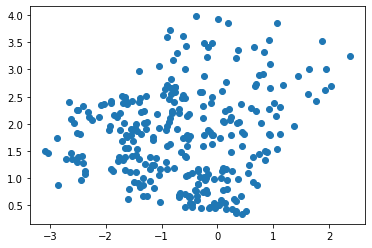

In [37]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

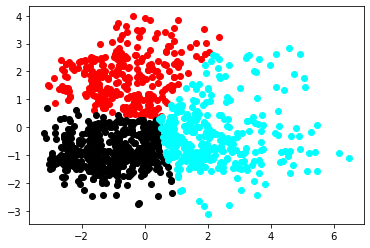

In [38]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
filtered_label1 = df[label == 1]

filtered_label2 = df[label == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'cyan')
plt.show()

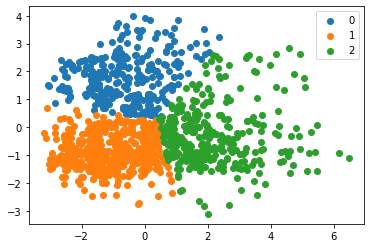

In [39]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

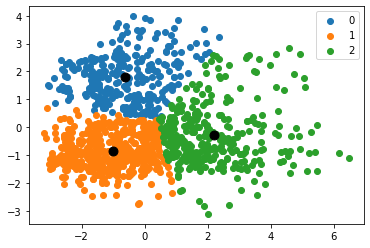

In [40]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()